In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from itertools import product
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# df = pd.read_csv('C:\\Users\\RFlamenb\\OneDrive - Sempra Energy\\documents\\SMU\\Data_Mining_MSDS7331\\Project1_Master\\data\\Crime_SDCounty_5.csv')

In [3]:
# df.to_pickle('C:\\Users\\RFlamenb\\OneDrive - Sempra Energy\\documents\\SMU\\Data_Mining_MSDS7331\\Project1_NewAttempt\\data\\df.pkl')

In [4]:
dfp = pd.read_pickle('C:\\Users\\RFlamenb\\OneDrive - Sempra Energy\\documents\\SMU\\Data_Mining_MSDS7331\\Project1_NewAttempt\\data\\df.pkl')
dfp.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,...,Jurisdiction_Population,TWO_OR_MORE,MdeAge_HISPANIC,MedAge_BLACK,MedAge_ASIAN,MedAgeWHITE,MedAge_AMERICAN_INDIAN,MedAge_OTHER,MedAge_PACIFIC_ISLANDER,MedAge_TWO_OR_MORE
0,16902,1186,32.929292,-116.857475,42,13,10/27/2010,2010.0,10.0,3952.0,...,485602.0,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8
1,16902,1186,32.929292,-116.857475,42,13,7/15/2011,2011.0,7.0,4213.0,...,485602.0,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8
2,16402,1040,32.810030,-116.910522,189,68,3/14/2008,2008.0,3.0,2995.0,...,485602.0,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8
3,16402,1040,32.810030,-116.910522,189,68,5/26/2008,2008.0,5.0,3068.0,...,485602.0,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8
4,16402,1040,32.810030,-116.910522,189,68,9/12/2008,2008.0,9.0,3177.0,...,485602.0,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8


In [5]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747213 entries, 0 to 747212
Data columns (total 52 columns):
TRACTCE10                   747213 non-null int64
BLOCKCE10                   747213 non-null int64
INTPTLAT10                  747213 non-null float64
INTPTLON10                  747213 non-null float64
POP100                      747213 non-null int64
HU100                       747213 non-null int64
date                        727534 non-null object
year                        727534 non-null float64
month                       727534 non-null float64
day                         727534 non-null float64
week                        727534 non-null float64
dow                         727534 non-null float64
time                        727534 non-null object
hour                        727534 non-null float64
address                     727534 non-null object
is_night                    727534 non-null float64
type                        727534 non-null object
city             

In [6]:
dups = dfp.duplicated(subset=None, keep='first').sum()

print('Duplicate Records:',dups)

Duplicate Records: 2354


In [7]:
dfp.isnull().sum()

TRACTCE10                        0
BLOCKCE10                        0
INTPTLAT10                       0
INTPTLON10                       0
POP100                           0
HU100                            0
date                         19679
year                         19679
month                        19679
day                          19679
week                         19679
dow                          19679
time                         19679
hour                         19679
address                      19679
is_night                     19679
type                         19679
city                         19679
nbrhood                      19679
community                    19679
comm_pop                     19679
asr_zone                    385268
council                      19679
council_pop                  19679
lampdist                    385268
desc_                        19715
lat                          19679
lon                          19679
SHAPE_Area          

In [8]:
ctype = pd.get_dummies(dfp['type'],drop_first=False)
ctype.head()

,ARSON,ASSAULT,BURGLARY,DRUGS/ALCOHOL VIOLATIONS,DUI,FRAUD,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


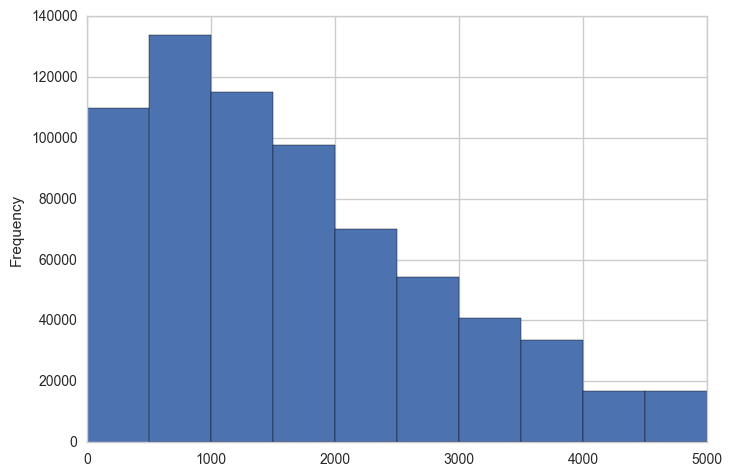

In [9]:
lawd = dfp['LawEnf_Facility_Distance']
lawd.plot(kind='hist', range=[0, 5000])

In [10]:
dfp['LawCats'] = pd.cut(dfp.LawEnf_Facility_Distance,[0,1000,3000,5000,1000000],4,labels=['1km_or_Less','1-3km','3-5km','5km_and_above']) # this creates a new variable
dfp.LawCats.describe()

count     737138
unique         4
top        1-3km
freq      337259
Name: LawCats, dtype: object

In [11]:
dfp.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,...,TWO_OR_MORE,MdeAge_HISPANIC,MedAge_BLACK,MedAge_ASIAN,MedAgeWHITE,MedAge_AMERICAN_INDIAN,MedAge_OTHER,MedAge_PACIFIC_ISLANDER,MedAge_TWO_OR_MORE,LawCats
0,16902,1186,32.929292,-116.857475,42,13,10/27/2010,2010.0,10.0,3952.0,...,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8,5km_and_above
1,16902,1186,32.929292,-116.857475,42,13,7/15/2011,2011.0,7.0,4213.0,...,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8,5km_and_above
2,16402,1040,32.810030,-116.910522,189,68,3/14/2008,2008.0,3.0,2995.0,...,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8,1km_or_Less
3,16402,1040,32.810030,-116.910522,189,68,5/26/2008,2008.0,5.0,3068.0,...,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8,1km_or_Less
4,16402,1040,32.810030,-116.910522,189,68,9/12/2008,2008.0,9.0,3177.0,...,13754.0,25.9,29.3,39.0,44.3,30.7,31.3,29.1,19.8,1km_or_Less


In [12]:
lawDist = pd.get_dummies(dfp['LawCats'],drop_first=False)
lawDist.head()

,1km_or_Less,1-3km,3-5km,5km_and_above
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [13]:
dfpd = pd.concat([dfp,ctype,lawDist],axis=1)
dfpd.head()

,TRACTCE10,BLOCKCE10,INTPTLAT10,INTPTLON10,POP100,HU100,date,year,month,day,...,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,WEAPONS,1km_or_Less,1-3km,3-5km,5km_and_above
0,16902,1186,32.929292,-116.857475,42,13,10/27/2010,2010.0,10.0,3952.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16902,1186,32.929292,-116.857475,42,13,7/15/2011,2011.0,7.0,4213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,16402,1040,32.810030,-116.910522,189,68,3/14/2008,2008.0,3.0,2995.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16402,1040,32.810030,-116.910522,189,68,5/26/2008,2008.0,5.0,3068.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,16402,1040,32.810030,-116.910522,189,68,9/12/2008,2008.0,9.0,3177.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [17]:
dfpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747213 entries, 0 to 747212
Data columns (total 71 columns):
TRACTCE10                   747213 non-null int64
BLOCKCE10                   747213 non-null int64
INTPTLAT10                  747213 non-null float64
INTPTLON10                  747213 non-null float64
POP100                      747213 non-null int64
HU100                       747213 non-null int64
date                        727534 non-null object
year                        727534 non-null float64
month                       727534 non-null float64
day                         727534 non-null float64
week                        727534 non-null float64
dow                         727534 non-null float64
time                        727534 non-null object
hour                        727534 non-null float64
address                     727534 non-null object
is_night                    727534 non-null float64
type                        727534 non-null object
city             

In [64]:
block_crimes = dfpd.groupby(['BLOCKCE10','TRACTCE10','POP100','HU100','PovertyPercentage','HISPANIC',
          'BLACK','AMERICAN_INDIAN','WHITE','ASIAN','OTHER','PACIFIC_ISLANDER','Jurisdiction','Jurisdiction_Population',
           'TWO_OR_MORE','MdeAge_HISPANIC','MedAge_BLACK','MedAge_ASIAN','MedAgeWHITE','MedAge_AMERICAN_INDIAN',
           'MedAge_OTHER','MedAge_PACIFIC_ISLANDER','MedAge_TWO_OR_MORE'])[['ARSON','ASSAULT','BURGLARY',
           'DRUGS/ALCOHOL VIOLATIONS','DUI','FRAUD','HOMICIDE','MOTOR VEHICLE THEFT',
           'ROBBERY','SEX CRIMES','THEFT/LARCENY','VANDALISM','VEHICLE BREAK-IN/THEFT',
           '1km_or_Less','1-3km','3-5km','5km_and_above','Crime_Indicator']].sum().reset_index()
block_crimes.head(10)

,BLOCKCE10,TRACTCE10,POP100,HU100,PovertyPercentage,HISPANIC,BLACK,AMERICAN_INDIAN,WHITE,ASIAN,...,ROBBERY,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,1km_or_Less,1-3km,3-5km,5km_and_above,Crime_Indicator
0,1000,100,312,180,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,3.0,0.0,1.0,0.0,9.0,0.0,0.0,9
1,1000,201,30,16,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,3
2,1000,202,60,38,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,1.0,0.0,6.0,0.0,12.0,0.0,0.0,12
3,1000,300,28,21,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,1.0,0.0,0.0,0.0,5.0,0.0,9.0,0.0,0.0,9
4,1000,400,834,531,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,6.0,7.0,33.0,29.0,34.0,263.0,0.0,0.0,0.0,263
5,1000,500,24,11,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,8
6,1000,600,0,0,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,1.0,2.0,15.0,16.0,12.0,0.0,0.0,0.0,0.0,119
7,1000,700,0,0,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,13.0,2.0,46.0,10.0,22.0,344.0,0.0,0.0,0.0,344
8,1000,800,41,22,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,4.0,1.0,10.0,2.0,1.0,82.0,0.0,0.0,0.0,82
9,1000,900,0,1,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,4.0,4.0,3.0,0.0,8.0,74.0,0.0,0.0,0.0,74


In [59]:
block_crimes['HighCrimeArea'] = (block_crimes.Crime_Indicator/block_crimes.POP100) # this creates a new variable
block_crimes.tail()

,BLOCKCE10,TRACTCE10,POP100,HU100,PovertyPercentage,HISPANIC,BLACK,AMERICAN_INDIAN,WHITE,ASIAN,...,SEX CRIMES,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,1km_or_Less,1-3km,3-5km,5km_and_above,Crime_Indicator,HighCrimeArea
23814,7032,7600,23,13,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.043478
23815,7034,7600,11,7,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,7,0.636364
23816,7035,7600,5,4,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,8,1.600000
23817,7038,7600,3,7,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,9,3.000000
23818,7039,7600,2,6,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,3.0,1.0,1.0,0.0,10.0,0.0,0.0,10,5.000000


In [63]:
block_crimes['HighCrimeIDC'] = (block_crimes.HighCrimeArea > 1) # this creates a new variable
block_crimes.tail()

,BLOCKCE10,TRACTCE10,POP100,HU100,PovertyPercentage,HISPANIC,BLACK,AMERICAN_INDIAN,WHITE,ASIAN,...,THEFT/LARCENY,VANDALISM,VEHICLE BREAK-IN/THEFT,1km_or_Less,1-3km,3-5km,5km_and_above,Crime_Indicator,HighCrimeArea,HighCrimeIDC
23814,7032,7600,23,13,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.043478,False
23815,7034,7600,11,7,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,0.0,0.0,1.0,0.0,7.0,0.0,0.0,7,0.636364,False
23816,7035,7600,5,4,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,1.0,0.0,0.0,0.0,8.0,0.0,0.0,8,1.600000,True
23817,7038,7600,3,7,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,2.0,0.0,0.0,0.0,9.0,0.0,0.0,9,3.000000,True
23818,7039,7600,2,6,0.1417,374977.0,81340.0,3469.0,586799.0,204010.0,...,3.0,1.0,1.0,0.0,10.0,0.0,0.0,10,5.000000,True


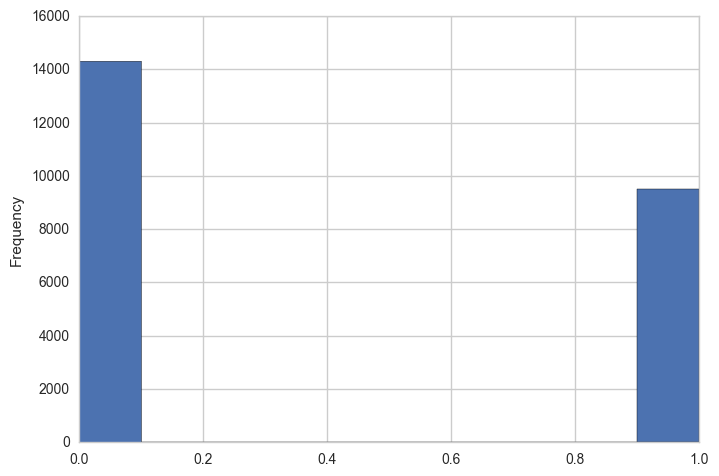

In [62]:
high_crime_var = block_crimes['HighCrimeIDC']
high_crime_var.plot(kind='hist')